# EDA project

In [162]:
!pip install pandas numpy matplotlib seaborn streamlit openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_excel("Sales_data.xlsx", engine="openpyxl")

In [165]:
df.head()

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
0,A0001,1,2024-01-08,I0001,5,Complete,2023-11-29,2023-11-29,10337,5.0,C5,0,SH0001,35.65,178.25,5.0,LPI,1,2023-11-29 08:15:34.917,DVBL
1,A0002,9,2024-01-08,I0002,4,Complete,2023-12-05,2023-12-05,10337,4.0,C5,0,SH0002,158.10,632.40,4.0,LPI,1,2023-12-05 08:16:13.473,DVBL
2,A0003,3,2024-01-11,I0003,20,Complete,2023-12-13,2023-12-13,10352,20.0,C5,0,SH0003,87.85,1757.00,20.0,LPI,1,2023-12-13 08:15:14.177,FMDO
3,A0004,7,2024-01-11,I0002,10,Complete,2023-12-13,2023-12-13,10343,10.0,C5,0,SH0004,158.10,1581.00,10.0,LPI,1,2023-12-13 08:15:14.417,FMDO
4,A0004,8,2024-01-10,I0004,3,Complete,2023-12-13,2023-12-13,10343,3.0,C12,0,SH0005,302.04,906.12,3.0,LPI,1,2023-12-13 08:15:14.423,FMDO


In [166]:
df.columns

Index(['Order ID', 'Order Line No', 'Date Shipped', 'Item ID', 'Qty Ordered',
       'Line Status', 'Order Date', 'Due Date', 'Customer ID', 'Qty Shipped',
       'UM', 'Qty Returned', 'Shipment ID', 'Unit Price', 'Total Price',
       'Qty Invoiced', 'Ship Warehouse', 'Ship To', 'Order Release Date',
       'Ship Code'],
      dtype='object')

>Exploring the data

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23296 non-null  object        
 1   Order Line No       23296 non-null  int64         
 2   Date Shipped        23296 non-null  datetime64[ns]
 3   Item ID             23296 non-null  object        
 4   Qty Ordered         23296 non-null  int64         
 5   Line Status         23296 non-null  object        
 6   Order Date          23296 non-null  datetime64[ns]
 7   Due Date            23296 non-null  datetime64[ns]
 8   Customer ID         23296 non-null  int64         
 9   Qty Shipped         23296 non-null  float64       
 10  UM                  23296 non-null  object        
 11  Qty Returned        23296 non-null  int64         
 12  Shipment ID         23296 non-null  object        
 13  Unit Price          23296 non-null  float64   

In [168]:
df.shape

(23296, 20)

In [169]:
print(df.isnull().sum())

Order ID                  0
Order Line No             0
Date Shipped              0
Item ID                   0
Qty Ordered               0
Line Status               0
Order Date                0
Due Date                  0
Customer ID               0
Qty Shipped               0
UM                        0
Qty Returned              0
Shipment ID               0
Unit Price                0
Total Price               0
Qty Invoiced              0
Ship Warehouse            0
Ship To                   0
Order Release Date    20665
Ship Code                 1
dtype: int64


> Handling the missing values

In [170]:
df = df.dropna(subset=["Ship Code"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23295 entries, 0 to 23295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23295 non-null  object        
 1   Order Line No       23295 non-null  int64         
 2   Date Shipped        23295 non-null  datetime64[ns]
 3   Item ID             23295 non-null  object        
 4   Qty Ordered         23295 non-null  int64         
 5   Line Status         23295 non-null  object        
 6   Order Date          23295 non-null  datetime64[ns]
 7   Due Date            23295 non-null  datetime64[ns]
 8   Customer ID         23295 non-null  int64         
 9   Qty Shipped         23295 non-null  float64       
 10  UM                  23295 non-null  object        
 11  Qty Returned        23295 non-null  int64         
 12  Shipment ID         23295 non-null  object        
 13  Unit Price          23295 non-null  float64   

In [171]:
df["Order Release Date"].fillna(df["Order Date"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23295 entries, 0 to 23295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            23295 non-null  object        
 1   Order Line No       23295 non-null  int64         
 2   Date Shipped        23295 non-null  datetime64[ns]
 3   Item ID             23295 non-null  object        
 4   Qty Ordered         23295 non-null  int64         
 5   Line Status         23295 non-null  object        
 6   Order Date          23295 non-null  datetime64[ns]
 7   Due Date            23295 non-null  datetime64[ns]
 8   Customer ID         23295 non-null  int64         
 9   Qty Shipped         23295 non-null  float64       
 10  UM                  23295 non-null  object        
 11  Qty Returned        23295 non-null  int64         
 12  Shipment ID         23295 non-null  object        
 13  Unit Price          23295 non-null  float64   

>Checking for duplicates

In [172]:
df.duplicated().sum()

101

In [173]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [174]:
df.dtypes

Order ID                      object
Order Line No                  int64
Date Shipped          datetime64[ns]
Item ID                       object
Qty Ordered                    int64
Line Status                   object
Order Date            datetime64[ns]
Due Date              datetime64[ns]
Customer ID                    int64
Qty Shipped                  float64
UM                            object
Qty Returned                   int64
Shipment ID                   object
Unit Price                   float64
Total Price                  float64
Qty Invoiced                 float64
Ship Warehouse                object
Ship To                        int64
Order Release Date    datetime64[ns]
Ship Code                     object
dtype: object

In [175]:
df.describe()

,Order Line No,Qty Ordered,Customer ID,Qty Shipped,Qty Returned,Unit Price,Total Price,Qty Invoiced,Ship To
count,23194.000000,23194.000000,23194.000000,23194.000000,23194.000000,23194.000000,23194.000000,23194.000000,23194.0
mean,4.239545,11.488833,11374.990084,9.630233,0.000043,182.296988,1055.670206,9.630277,1.0
std,13.828038,23.988379,1787.508412,16.919974,0.006566,175.557505,1590.961304,16.919950,0.0
min,1.000000,1.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.083333,1.0
25%,1.000000,2.000000,10481.000000,2.000000,0.000000,38.850000,250.850000,2.000000,1.0
50%,1.000000,5.000000,11317.000000,4.000000,0.000000,155.600000,542.160000,4.000000,1.0
75%,3.000000,10.000000,12261.000000,10.000000,0.000000,256.440000,1262.400000,10.000000,1.0
max,286.000000,400.000000,14831.000000,380.000000,1.000000,1564.560000,39830.000000,380.000000,1.0


In [176]:
df.shape

(23194, 20)

In [177]:
df.nunique()

Order ID              12873
Order Line No           151
Date Shipped            262
Item ID                 131
Qty Ordered              93
Line Status               2
Order Date              447
Due Date                402
Customer ID             300
Qty Shipped             160
UM                        4
Qty Returned              2
Shipment ID           22446
Unit Price              891
Total Price            4544
Qty Invoiced            159
Ship Warehouse            3
Ship To                   1
Order Release Date     2907
Ship Code                 6
dtype: int64

>Analysing data further

In [178]:
df.columns
# checking column names again

Index(['Order ID', 'Order Line No', 'Date Shipped', 'Item ID', 'Qty Ordered',
       'Line Status', 'Order Date', 'Due Date', 'Customer ID', 'Qty Shipped',
       'UM', 'Qty Returned', 'Shipment ID', 'Unit Price', 'Total Price',
       'Qty Invoiced', 'Ship Warehouse', 'Ship To', 'Order Release Date',
       'Ship Code'],
      dtype='object')

>Finding some business insights

In [179]:
# calculating revenue and orders count
total_revenue=df['Total Price'].sum()
total_orders = df['Order ID'].nunique()
print(f"Total Revenue is {total_revenue:.2f}")
print(f"Total orders is {total_orders}")

Total Revenue is 24485214.76
Total orders is 12873


In [180]:
# items generating highest revenue
top_items=df.groupby('Item ID')['Total Price'].sum().sort_values(ascending=False).head(10)
print(f"Items generating highest revenue are {top_items}")

Items generating highest revenue are Item ID
I0021    1811403.96
I0016    1782119.25
I0051     971796.25
I0045     952172.04
I0026     825744.90
I0010     807133.44
I0088     760198.90
I0079     665032.50
I0008     599599.20
I0023     588880.80
Name: Total Price, dtype: float64


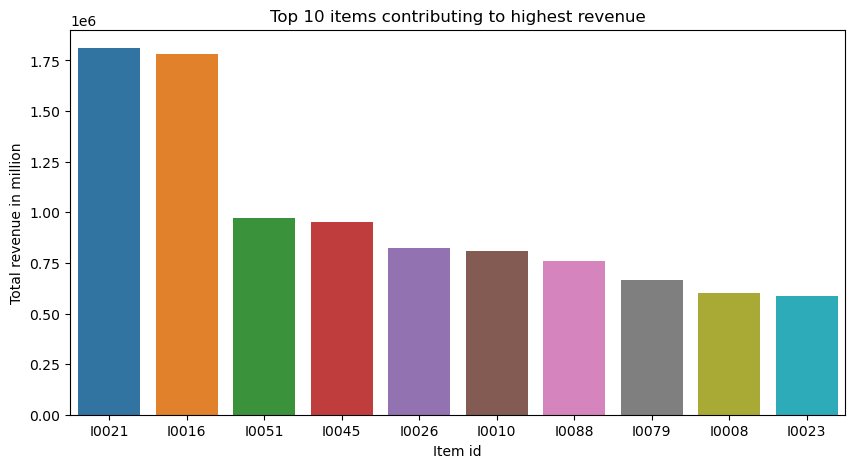

In [181]:
# displaying the items generating highest revenue
plt.figure(figsize=(10,5))
sns.barplot(x=top_items.index,y=top_items.values)
plt.title("Top 10 items contributing to highest revenue")
plt.xlabel("Item id")
plt.ylabel("Total revenue in million")
plt.show()

In [182]:
# Average order value
avg_order_value=df.groupby('Order ID')['Total Price'].sum().mean()
print(f"Average order value is {avg_order_value:.1f}")

Average order value is 1902.1


Monthly sales details month-year
2022-12        318.20
2023-01       9675.12
2023-02      18187.50
2023-03      28295.64
2023-04     101932.70
2023-05      19733.20
2023-06      67846.33
2023-07      43599.40
2023-08     247765.16
2023-09      95682.10
2023-10     498147.87
2023-11     167384.86
2023-12     721705.66
2024-01    2439712.60
2024-02    2078106.82
2024-03    1836721.65
2024-04    1853176.83
2024-05    1976138.99
2024-06    2021014.87
2024-07    2109815.55
2024-08    1962954.09
2024-09    1762336.45
2024-10    2063563.05
2024-11    1378791.97
2024-12     982608.15
Freq: M, Name: Total Price, dtype: float64


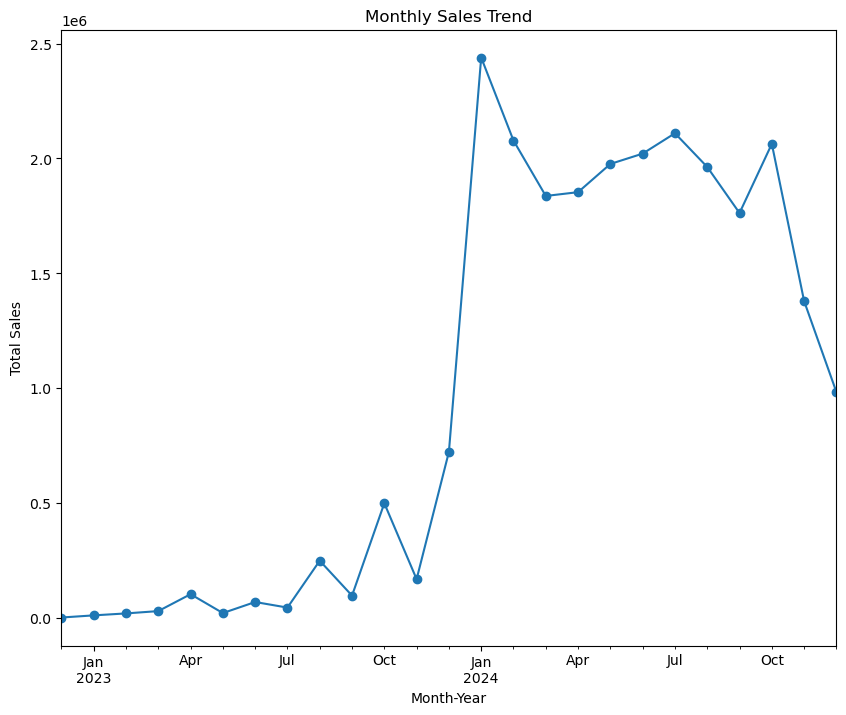

In [183]:
# sales trend monthly
df['month-year']=df['Order Date'].dt.to_period('M')
monthly_sales=df.groupby('month-year')['Total Price'].sum()
print(f"Monthly sales details {monthly_sales}")

plt.figure(figsize=(10,8))
monthly_sales.plot(kind='line',marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.show()

In [184]:
monthly_sales_high=df.groupby('month-year')['Total Price'].sum().sort_values(ascending=False).head()
print(f"Month's with high sale {monthly_sales_high}")
monthly_sales_low=df.groupby('month-year')['Total Price'].sum().sort_values(ascending=True).head()
print(f"Month's with low sale {monthly_sales_low}")

Month's with high sale month-year
2024-01    2439712.60
2024-07    2109815.55
2024-02    2078106.82
2024-10    2063563.05
2024-06    2021014.87
Freq: M, Name: Total Price, dtype: float64
Month's with low sale month-year
2022-12      318.20
2023-01     9675.12
2023-02    18187.50
2023-05    19733.20
2023-03    28295.64
Freq: M, Name: Total Price, dtype: float64


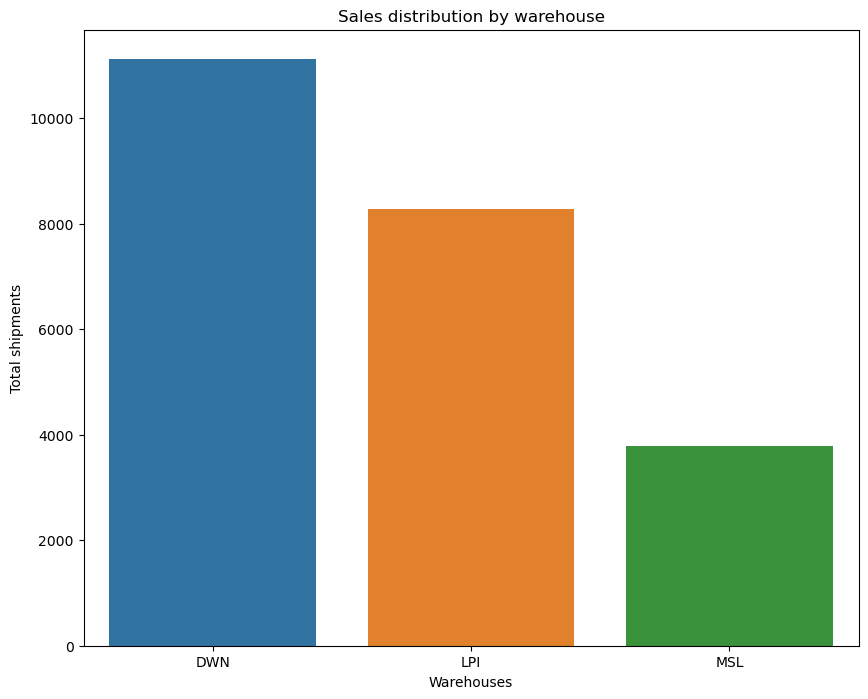

In [185]:
# sales distribution by warehouse
plt.figure(figsize=(10,8))
sns.barplot(x=df['Ship Warehouse'].value_counts().index, y=df['Ship Warehouse'].value_counts().values)
plt.title('Sales distribution by warehouse')
plt.xlabel('Warehouses')
plt.ylabel('Total shipments')
plt.show()

Top ten customers by order count 10352    558
11480    532
10337    527
10336    444
11469    421
10364    419
12195    396
10782    380
11336    376
10343    370
Name: Customer ID, dtype: int64


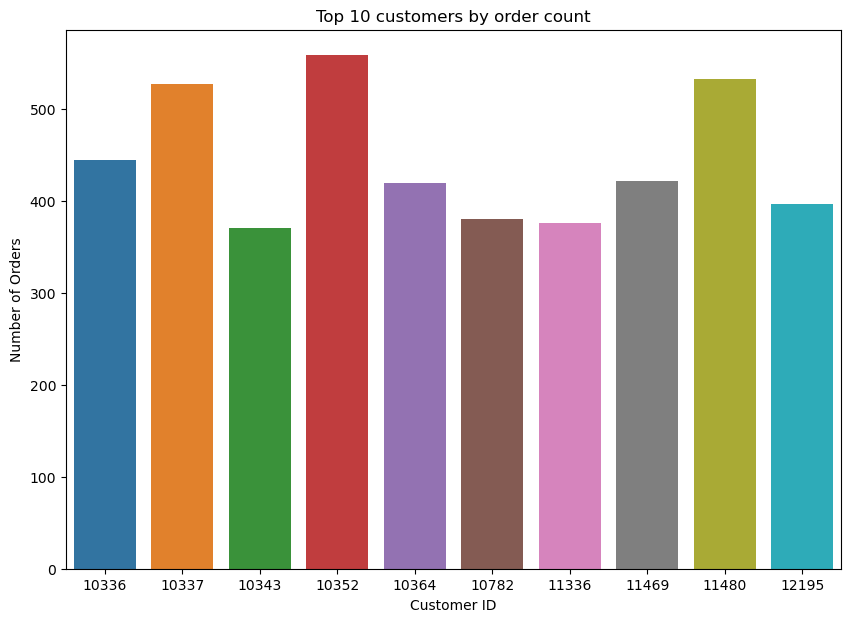

In [186]:
# customers placing most orders
top_customers=df['Customer ID'].value_counts().head(10)
print(f"Top ten customers by order count {top_customers}")

plt.figure(figsize=(10,7))
sns.barplot(x=top_customers.index,y=top_customers.values)
plt.title("Top 10 customers by order count")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.show()

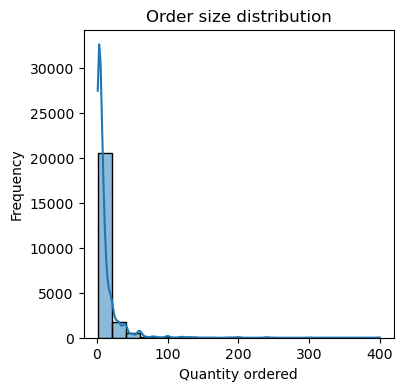

In [187]:
# most common order sizes
plt.figure(figsize=(4,4))
sns.histplot(df['Qty Ordered'],bins=20,kde=True)
plt.title("Order size distribution")
plt.xlabel('Quantity ordered')
plt.ylabel("Frequency")
plt.show()

In [188]:
# average processing time
df['Processing Time'] = (df['Date Shipped'] - df['Order Date']).dt.days
avg_processing_time = df['Processing Time'].mean()
print(f"Average Order Processing Time: {avg_processing_time:.2f} days")

Average Order Processing Time: 28.43 days


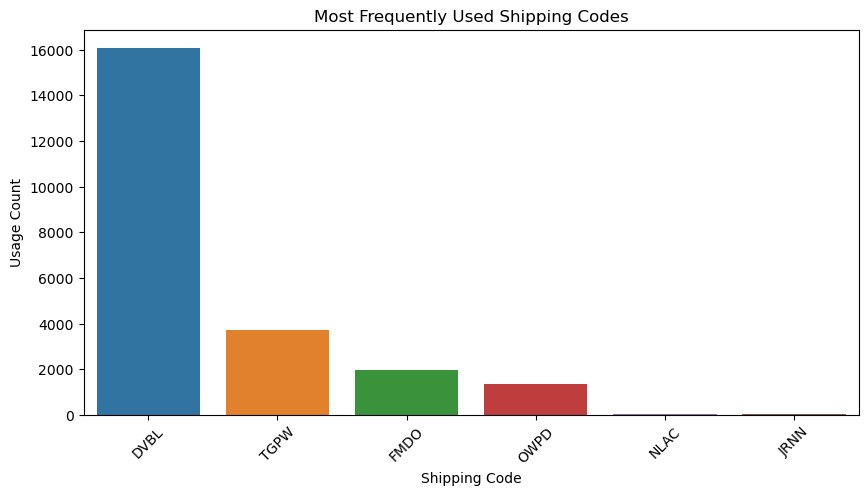

In [189]:
# most used shipping codes
plt.figure(figsize=(10,5))
sns.barplot(x=df['Ship Code'].value_counts().index, y=df['Ship Code'].value_counts().values)
plt.title("Most Frequently Used Shipping Codes")
plt.xlabel("Shipping Code")
plt.ylabel("Usage Count")
plt.xticks(rotation=45)
plt.show()

In [190]:
# on time and delayed shipment info
df['On Time']=df['Date Shipped']<=df['Due Date']
on_time_ratio=df['On Time'].value_counts(normalize=True)*100
print(on_time_ratio)

False    88.544451
True     11.455549
Name: On Time, dtype: float64


warehouse with most orders are DWN    11125
LPI     8282
MSL     3787
Name: Ship Warehouse, dtype: int64


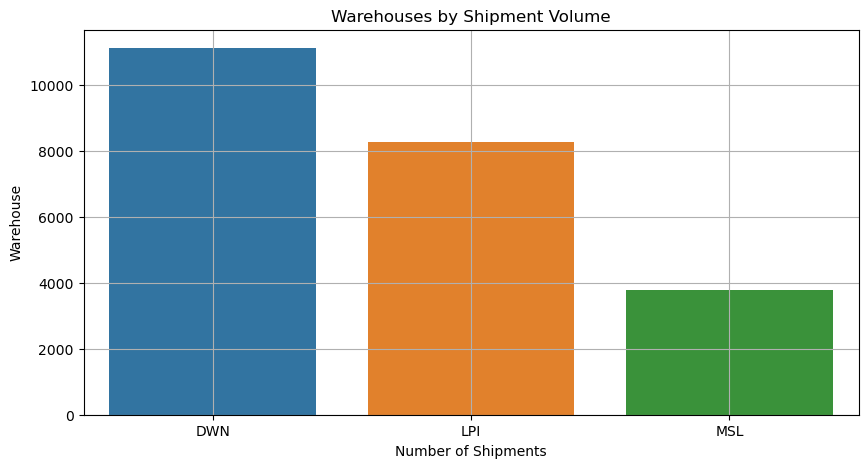

In [191]:
# warehouse with most orders
top_order_warehouse=df['Ship Warehouse'].value_counts()
print(f"warehouse with most orders are {top_order_warehouse}")

plt.figure(figsize=(10, 5))
sns.barplot(x=top_order_warehouse.index, y=top_order_warehouse.values)
plt.title("Warehouses by Shipment Volume")
plt.xlabel("Number of Shipments")
plt.ylabel("Warehouse")
plt.grid()
plt.show()


In [192]:
# average auantity shipped per order
avg_qty_shipped = df['Qty Shipped'].mean()
print(f"Average Quantity Shipped per Order: {avg_qty_shipped:.2f}")

Average Quantity Shipped per Order: 9.63


In [193]:
# top returned items
returned_items=df.groupby('Item ID')['Qty Returned'].sum().sort_values(ascending=False).head()
print(f"Top returned item is {returned_items}")

Top returned item is Item ID
I0085    1
I0001    0
I0099    0
I0097    0
I0096    0
Name: Qty Returned, dtype: int64


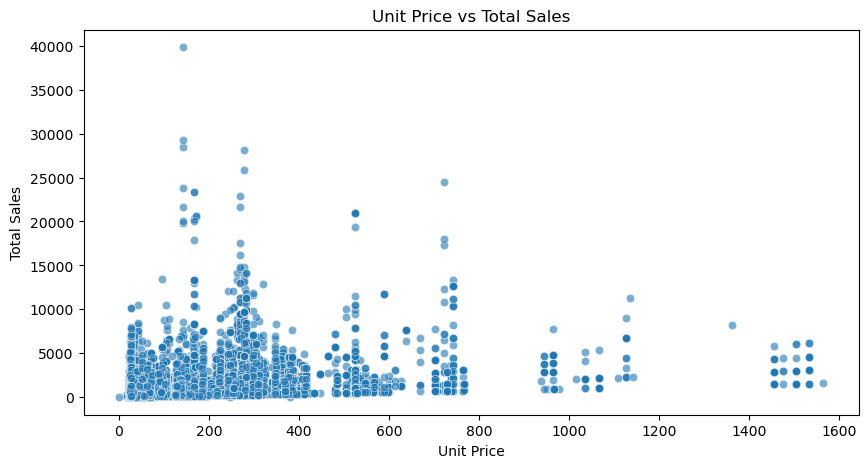

In [194]:
# total sales by unit price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Unit Price'], y=df['Total Price'], alpha=0.6)
plt.title("Unit Price vs Total Sales")
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.show()

Top 10 customer generating revenue Customer ID
11469    1834583.43
10364    1034956.71
10484    1013703.01
14606     981393.70
10352     768750.46
11424     745752.05
11562     697237.01
11455     695755.17
13270     490337.85
11336     437464.60
Name: Total Price, dtype: float64


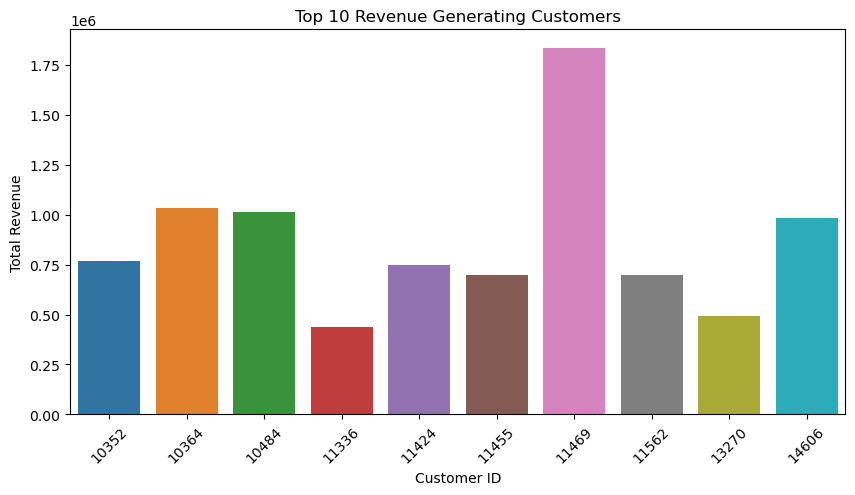

In [195]:
# customer contributing the most revenue
top_rev_cus=df.groupby('Customer ID')['Total Price'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 customer generating revenue {top_rev_cus}")

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rev_cus.index, y=top_rev_cus.values)
plt.title("Top 10 Revenue Generating Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# RECOMMENDATIONS:

> Revenue & Orders Overview:

Total Revenue: $24,485,214.76
Total Unique Orders: 12,873

The highest revenue comes from:
Item I0021 → $1.81M
Item I0016 → $1.78M
Item I0051 → $971K
Item I0045 → $952k
Item I0026 → $825K

Increase inventory levels for top-selling items (I0021, I0016, I0051, I0045, I0026) to prevent stockouts, Focus marketing and promotions on these high-revenue products.

> Shipments:

Warehouses DWN and LPI handle the most shipments.
88.5% of shipments are delayed, while only 11.4% are delivered on time, so optimize delivery timelines by analyzing delay reasons and Work with logistics partners to reduce shipment delays.

> Top 3 customers by order count:

Customer 11480 → 532 orders
Customer 10337 → 527 orders
Customer 10336 → 444 orders

Offer personalized promotions based on past purchase and increase engagement with email campaigns, loyalty rewards.

> Returns:

Investigate Item I0085 for return issues & improve quality.

> Sales trend:

Sales trend fluctuates across the months, with seasonal spikes.
Peak months show higher sales, suggesting seasonal demand variations.Plan seasonal marketing campaigns & promotions. Introduce discounts or incentives in slow months.

> Pricing Strategy & Profitability

Certain low-priced items contribute higher sales. Adjust marketing focus towards higher-margin products.